**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [3]:
# Import the data set
df = pd.read_csv("Task 1 Data set/cleaned_data.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
# Define the sigmoid function
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [5]:
# Create a train/test split
np.random.seed(24)
df2 = df[["PAY_1","LIMIT_BAL","default payment next month"]]
msk = np.random.randn(len(df2)) < 0.8
train = df2[msk].astype(np.int)
test = df2[~msk].astype(np.int)
print("Training set length:",len(train),",Test set length:",len(test))
X_train,y_train = train.drop("default payment next month", axis=1),train["default payment next month"]
print(f"Features traing set length:{len(X_train)}, Labels traning set length:{len(y_train)}")
X_test,y_test = test.drop("default payment next month", axis=1),test["default payment next month"]
print(f"Features test set length:{len(X_test)}, Labels test set length:{len(y_test)}")

Training set length: 21079 ,Test set length: 5585
Features traing set length:21079, Labels traning set length:21079
Features test set length:5585, Labels test set length:5585


______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [7]:
# Fit the logistic regression model on training data
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [8]:
# Make predictions using `.predict()`
y_preds = model.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
# Find class probabilities using `.predict_proba()`
y_probs = model.predict_proba(X_test)
y_probs

array([[0.53421573, 0.46578427],
       [0.85594402, 0.14405598],
       [0.98684785, 0.01315215],
       ...,
       [0.92182379, 0.07817621],
       [0.84728509, 0.15271491],
       [0.63374309, 0.36625691]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

### Add column of 1s to features
X_train = X_train.assign(col1=1)
X_test = X_test.assign(col1=1)
X_train.head(),X_test.head()

In [10]:
# Get coefficients and intercepts from trained model
w = model.coef_
b = model.intercept_

In [11]:
# Maually calculate predicted probabilitiesn
def predict(w, b, X):
    pred = []
    z = np.dot(w,X)+b
    a = sigmoid(z)
    for i in range(0,len(a[0])):
        if (a[0][i] > 0.5): 
            pred.append(1)
        elif (a[0][i] <= 0.5):
            pred.append(0)
    return (pred),a

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [12]:
# Manually calculate predicted classes
Y_prediction_test, Y_proba_test = predict(w, b, X_test.T)
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))

test accuracy: 77.79767233661593 %


In [13]:
# Compare to scikit-learn's predicted classes
y_prediction_test = model.predict(X_test)
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

test accuracy: 77.79767233661593 %


______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

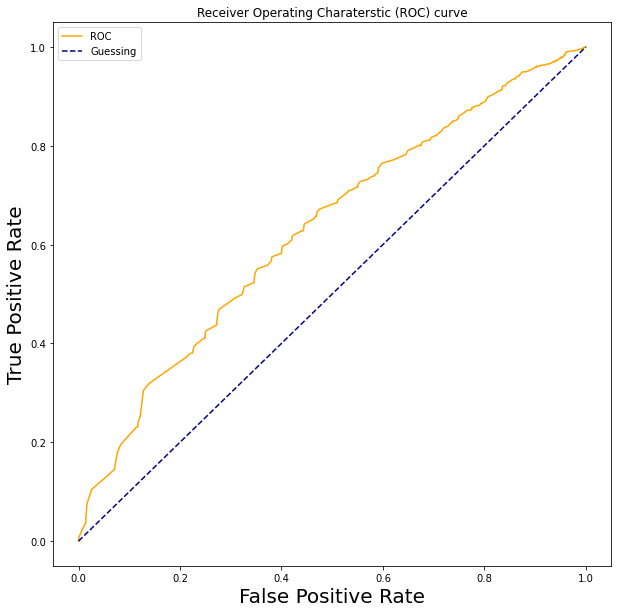

ROC AUC Score percentage:63.05%


In [14]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
fpr, tpr, threshold = roc_curve(y_test, y_probs[:,1])
plt.figure(figsize = (10,10))
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing') # Baseline
plt.xlabel("False Positive Rate",size=20)
plt.ylabel("True Positive Rate",size=20)
plt.title("Receiver Operating Charaterstic (ROC) curve")
plt.legend()
plt.show()
print(f"ROC AUC Score percentage:{roc_auc_score(y_test,y_probs[:,1])*100:.02f}%")

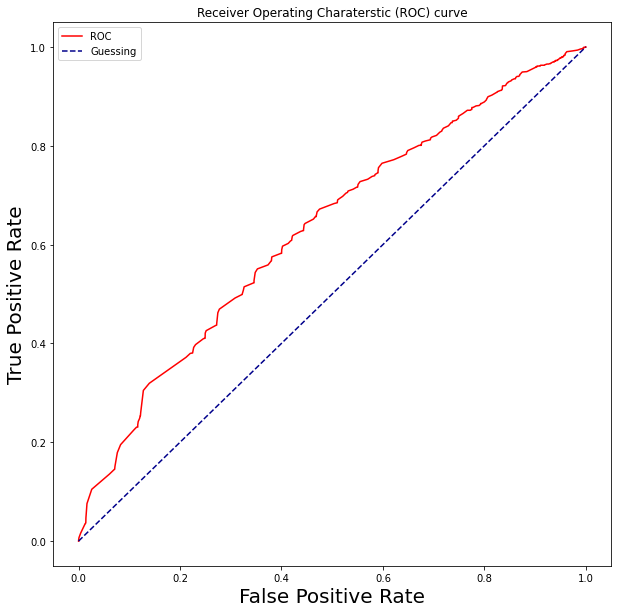

ROC AUC Score percentage:63.05%


In [15]:
# Use manually predicted probabilities to calculate ROC AUC
fpr, tpr, threshold = roc_curve(y_test, y_probs[:,1])
plt.figure(figsize = (10,10))
plt.plot(fpr,tpr,color='red',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing') # Baseline
plt.xlabel("False Positive Rate",size=20)
plt.ylabel("True Positive Rate",size=20)
plt.title("Receiver Operating Charaterstic (ROC) curve")
plt.legend()
plt.show()
print(f"ROC AUC Score percentage:{roc_auc_score(y_test,y_probs[:,1])*100:.02f}%")